In [1]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv('titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape

(891, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
df['Parch'].nunique()

7

In [51]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
## now as age plays an important aspect to we will fiil it and cabin colum plays no imp so we will simply drop the null values


In [14]:
mean = df["Age"].mean()
std = df["Age"].std()
is_null = df["Age"].isnull().sum()
    
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
# fill NaN values in Age column with random values generated
age_slice = df["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
df["Age"] = age_slice

In [16]:
df["Age"].isnull().sum()

np.int64(0)

In [17]:
#Fill Embarked with 'S' i.e. the most frequent values
df["Embarked"] = df["Embarked"].fillna("S")

In [19]:
col_to_drop = ['PassengerId','Cabin', 'Ticket','Name']
df.drop(col_to_drop, axis=1, inplace = True)

In [20]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

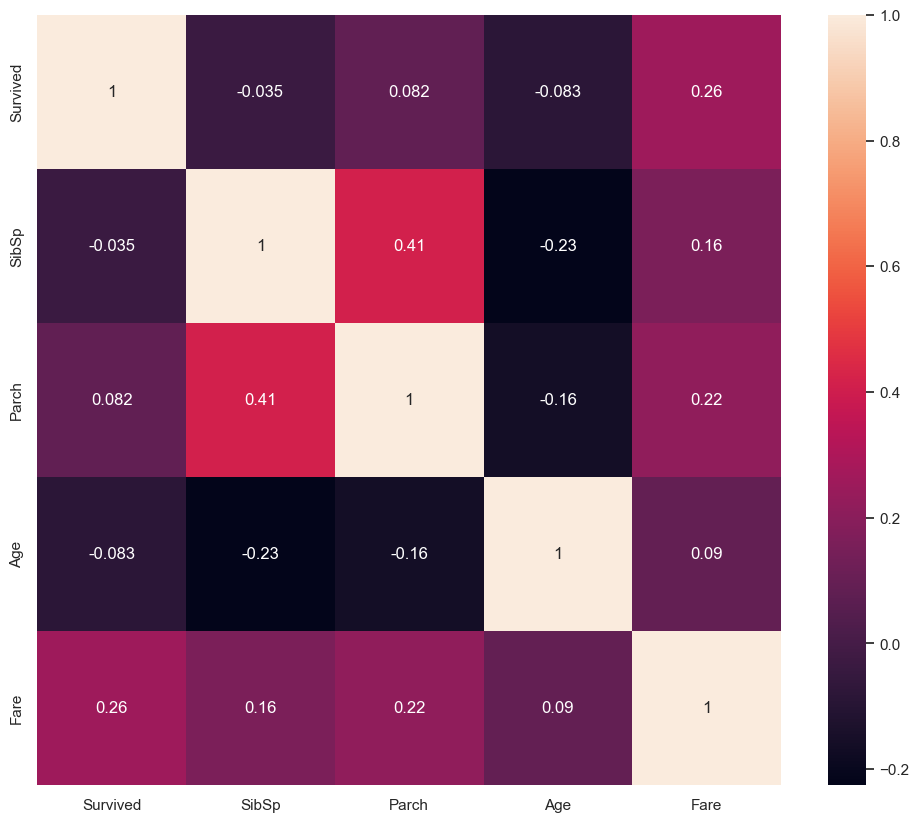

In [53]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(df[["Survived","SibSp","Parch","Age","Fare"]].corr(), annot=True)

In [44]:
#Only Fare feature seems to have a significative correlation with the survival probability.
#It doesn't mean that the other features are not usefull.
#Subpopulations in these features can be correlated with the survival.
#To determine this, we need to explore in detail these features

In [45]:
# UNIVARIATE ANALYSIS

In [25]:
df['SibSp'].nunique()

7

In [27]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

Text(0, 0.5, 'Survival Probability')

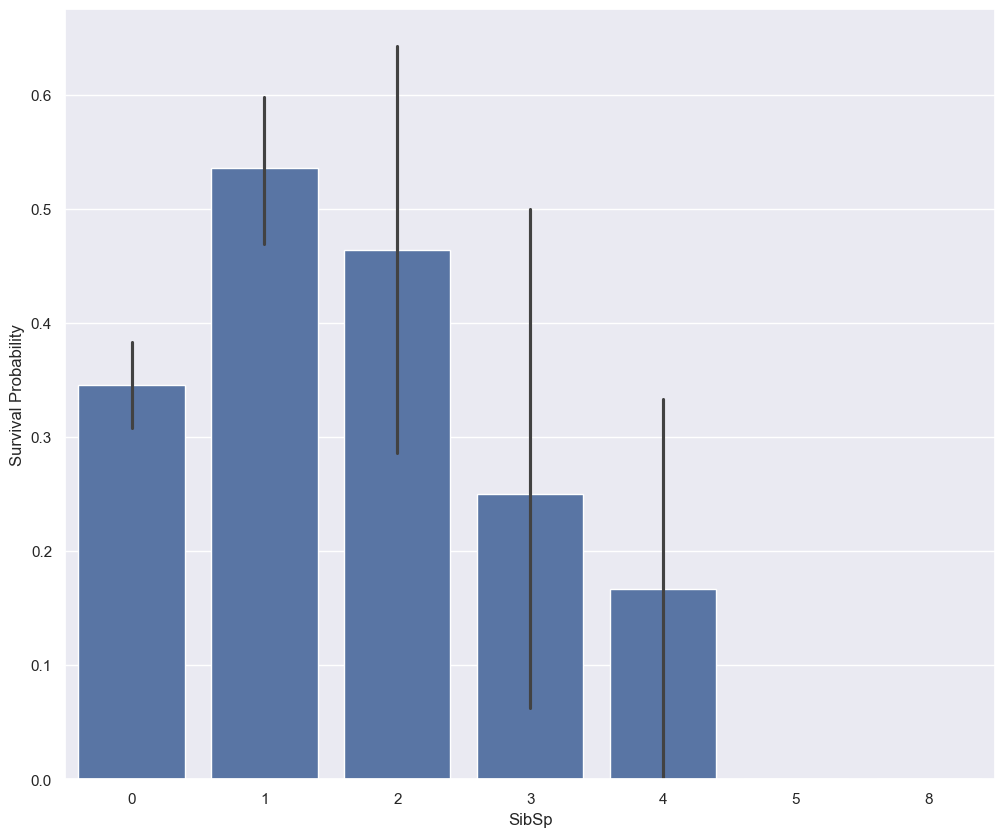

In [33]:
# Set figure size
sns.set(rc={'figure.figsize':(12, 10)})

# Create bar plot
bargraph_sibsp = sns.barplot(x="SibSp", y="Survived", data=df)

# Set y-axis label
bargraph_sibsp.set_ylabel("Survival Probability")

In [34]:
#It seems that passengers having a lot of siblings/spouses have less chance to survive.
#Single passengers (0 SibSP) or with two other persons (SibSP 1 or 2) have more chance to survive.

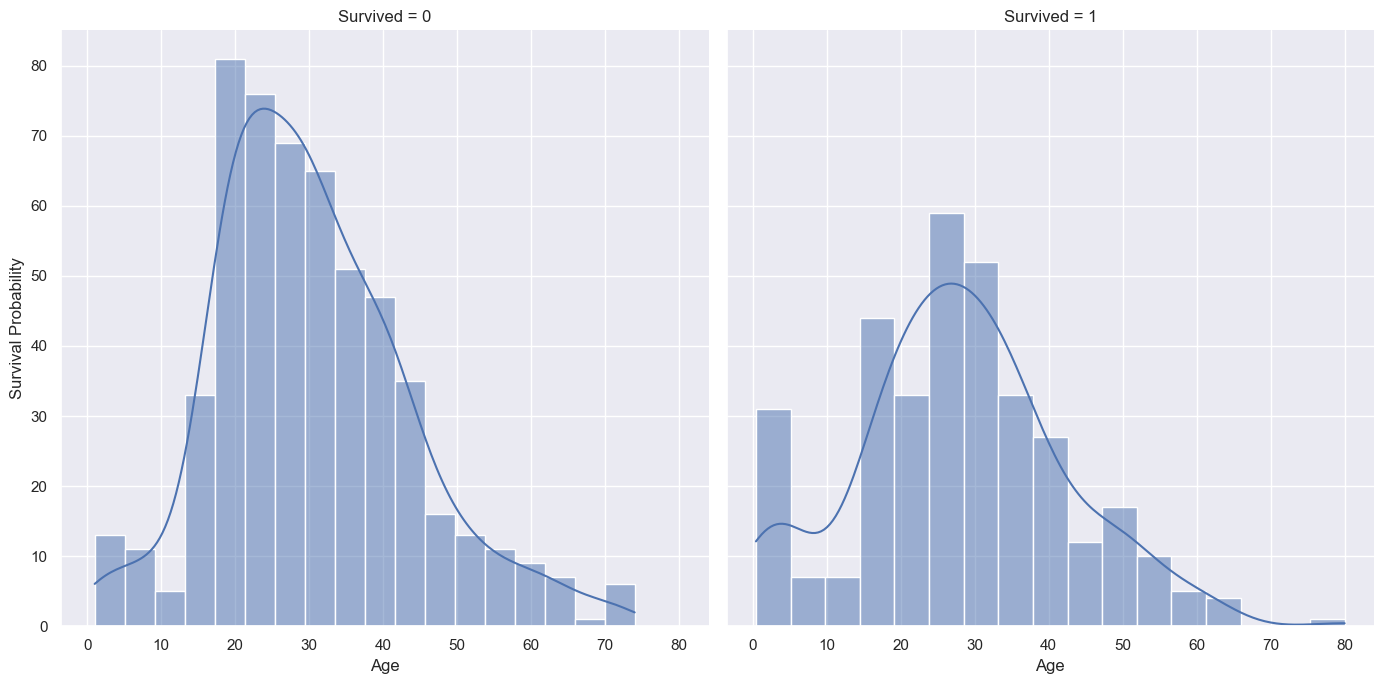

In [36]:


# Create a FacetGrid with corrected parameters
age_visual = sns.FacetGrid(df, col='Survived', height=7)

# Use sns.histplot or sns.kdeplot for the distribution plot
age_visual.map(sns.histplot, "Age", kde=True)

# Set the y-axis label
age_visual.set_ylabels("Survival Probability")

In [38]:
#Age distribution seems to be a tailed distribution, maybe a gaussian distribution.

#We notice that age distributions are not the same in the survived and not survived subpopulations. Indeed, there is a peak corresponding to young passengers, that have survived. We also see that passengers between 60-80 have less survived.

#So, even if "Age" is not correlated with "Survived", we can see that there is age categories of passengers that of have more or less chance to survive.

#It seems that very young passengers have more chance to survive

Text(0, 0.5, 'Survival Probability')

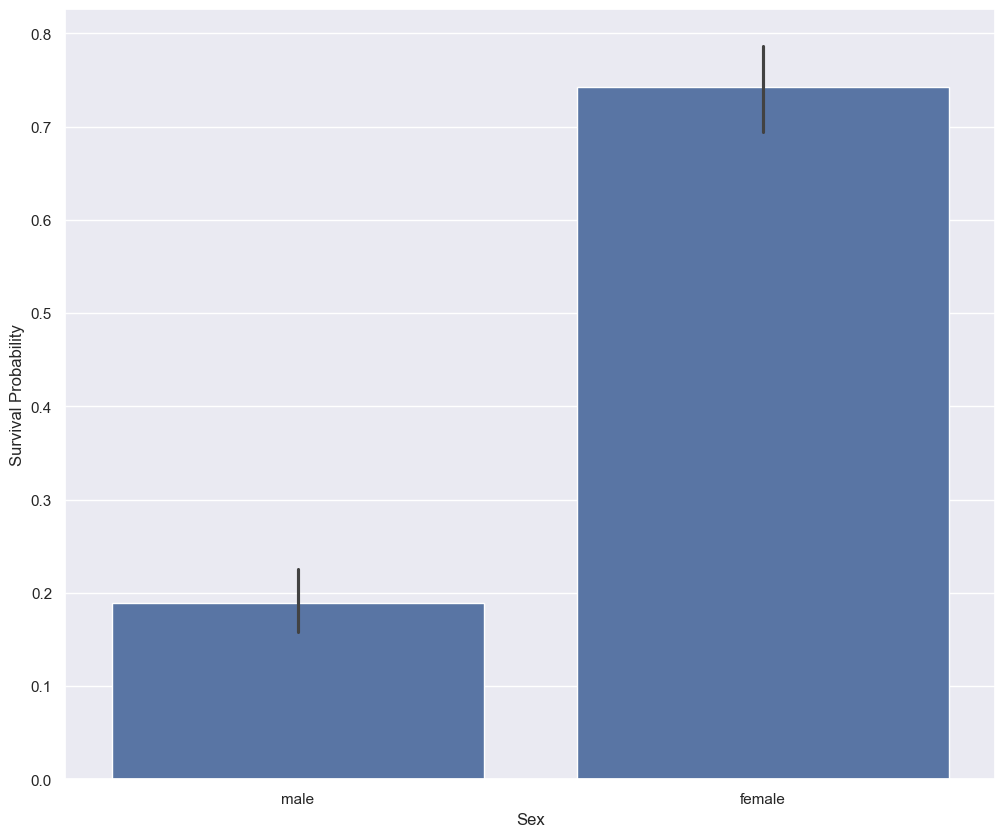

In [40]:
plt.figure(figsize=(12, 10))
age_plot = sns.barplot(x="Sex", y="Survived", data=df)

# Set the y-axis label directly
age_plot.set_ylabel("Survival Probability")

In [41]:
#It is clearly obvious that Male have less chance to survive than Female. 
#So Sex, might play an important role in the prediction of the survival. For those who have seen the Titanic movie (1997),
#I am sure, we all remember this sentence during the evacuation - Women and children first

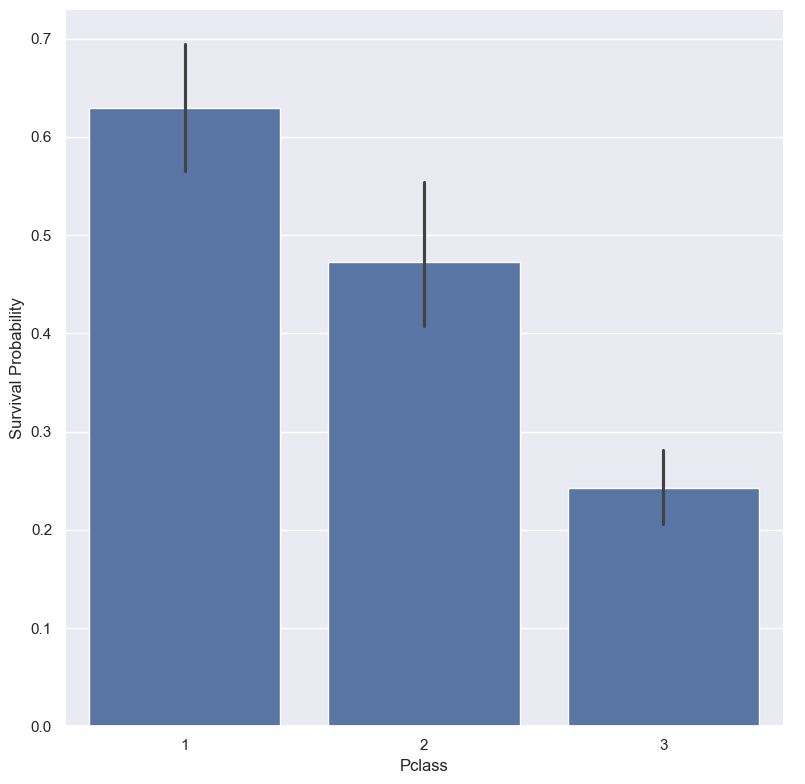

In [43]:

pclass = sns.catplot(x="Pclass", y="Survived", data=df, kind="bar", height=8)

# Set the y-axis label
pclass.set_ylabels("Survival Probability")

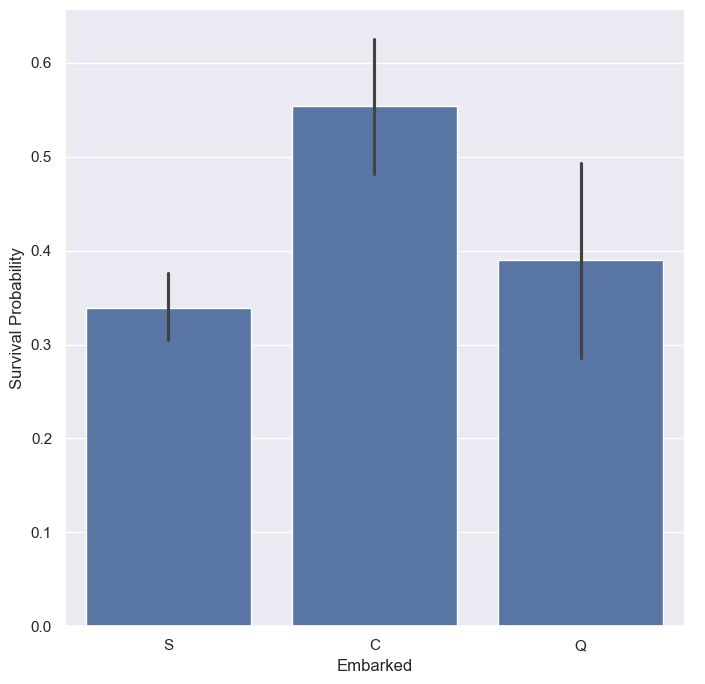

In [54]:
g = sns.catplot(x="Embarked", y="Survived", data=df, height=7, kind="bar")

# Set the y-axis label
g.set_ylabels("Survival Probability")

In [55]:
#Passenger coming from Cherbourg (C) have more chance to survive.

In [46]:
# BIVARIATE ANALYSIS

In [47]:
# Pclass vs Survived by Sex

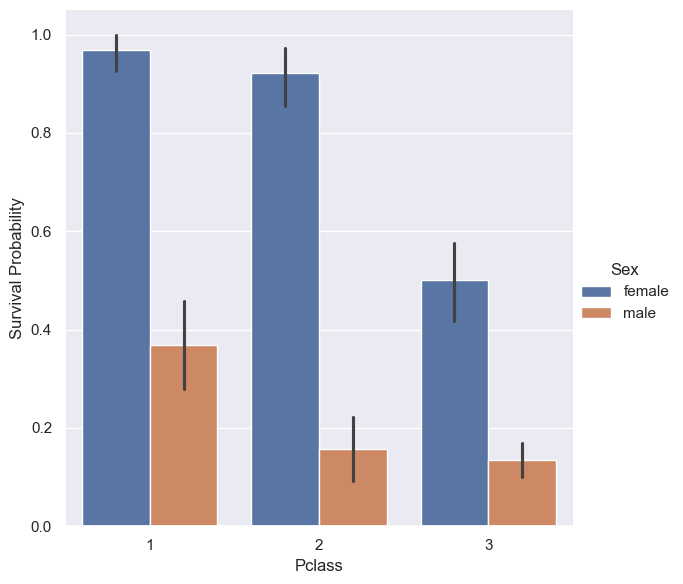

In [49]:
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=df, height=6, kind="bar")

# Set the y-axis label
g.set_ylabels("Survival Probability")

In [56]:
#Pclass vs Embarked

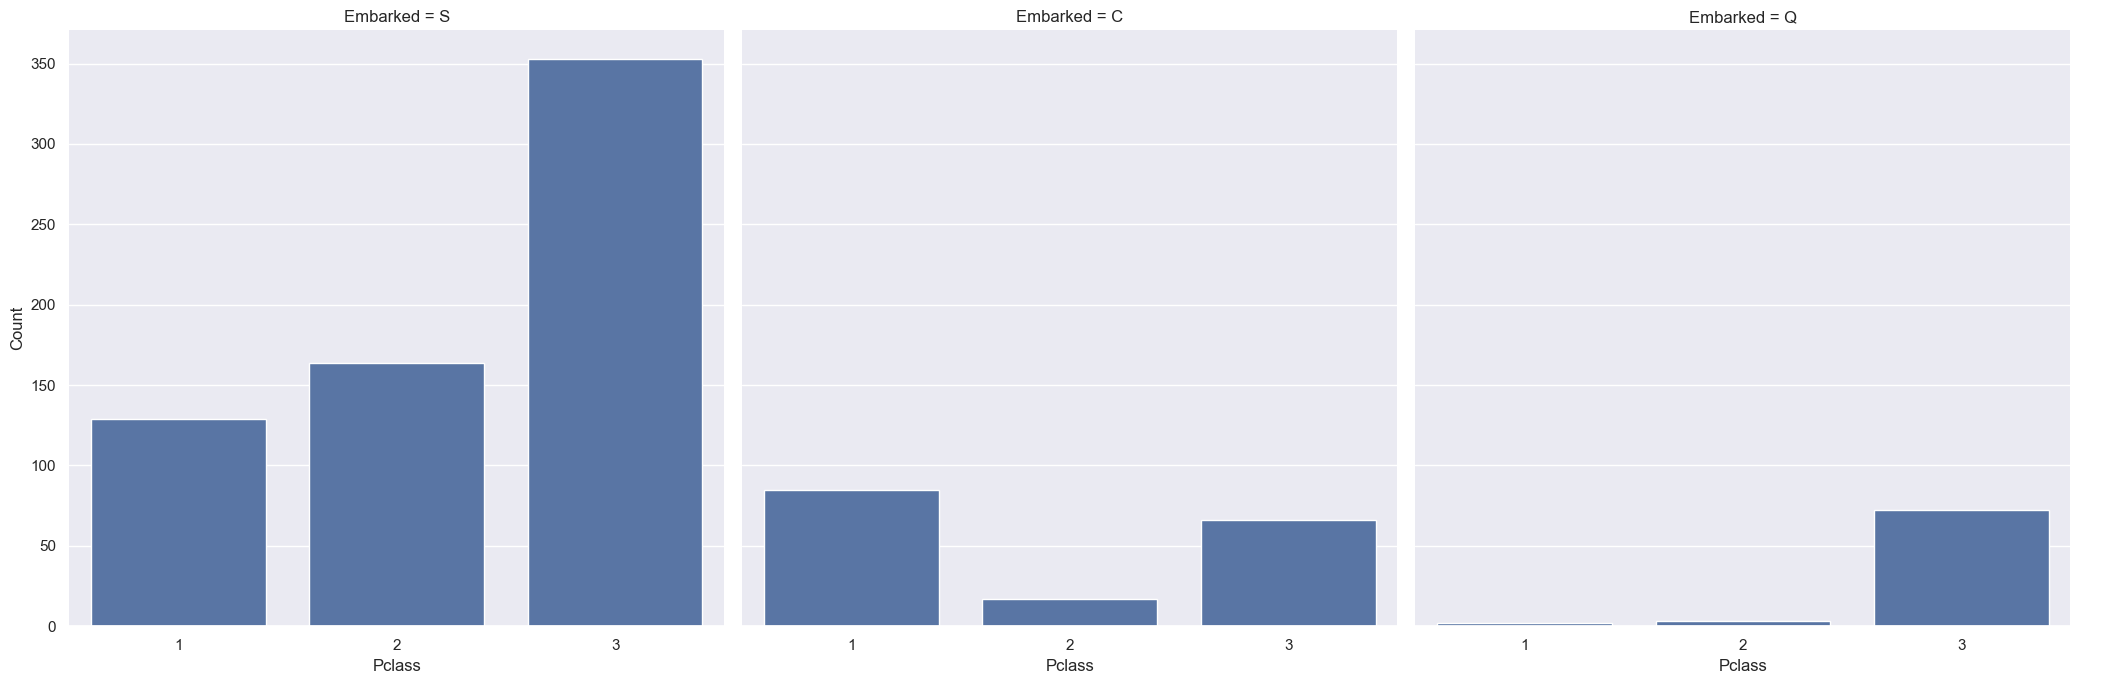

In [58]:
g = sns.catplot(x="Pclass", col="Embarked", data=df, height=7, kind="count")

# Remove the left spine
g.despine(left=True)

# Set the y-axis label
g.set_ylabels("Count")

In [59]:
#pclass vs Sex

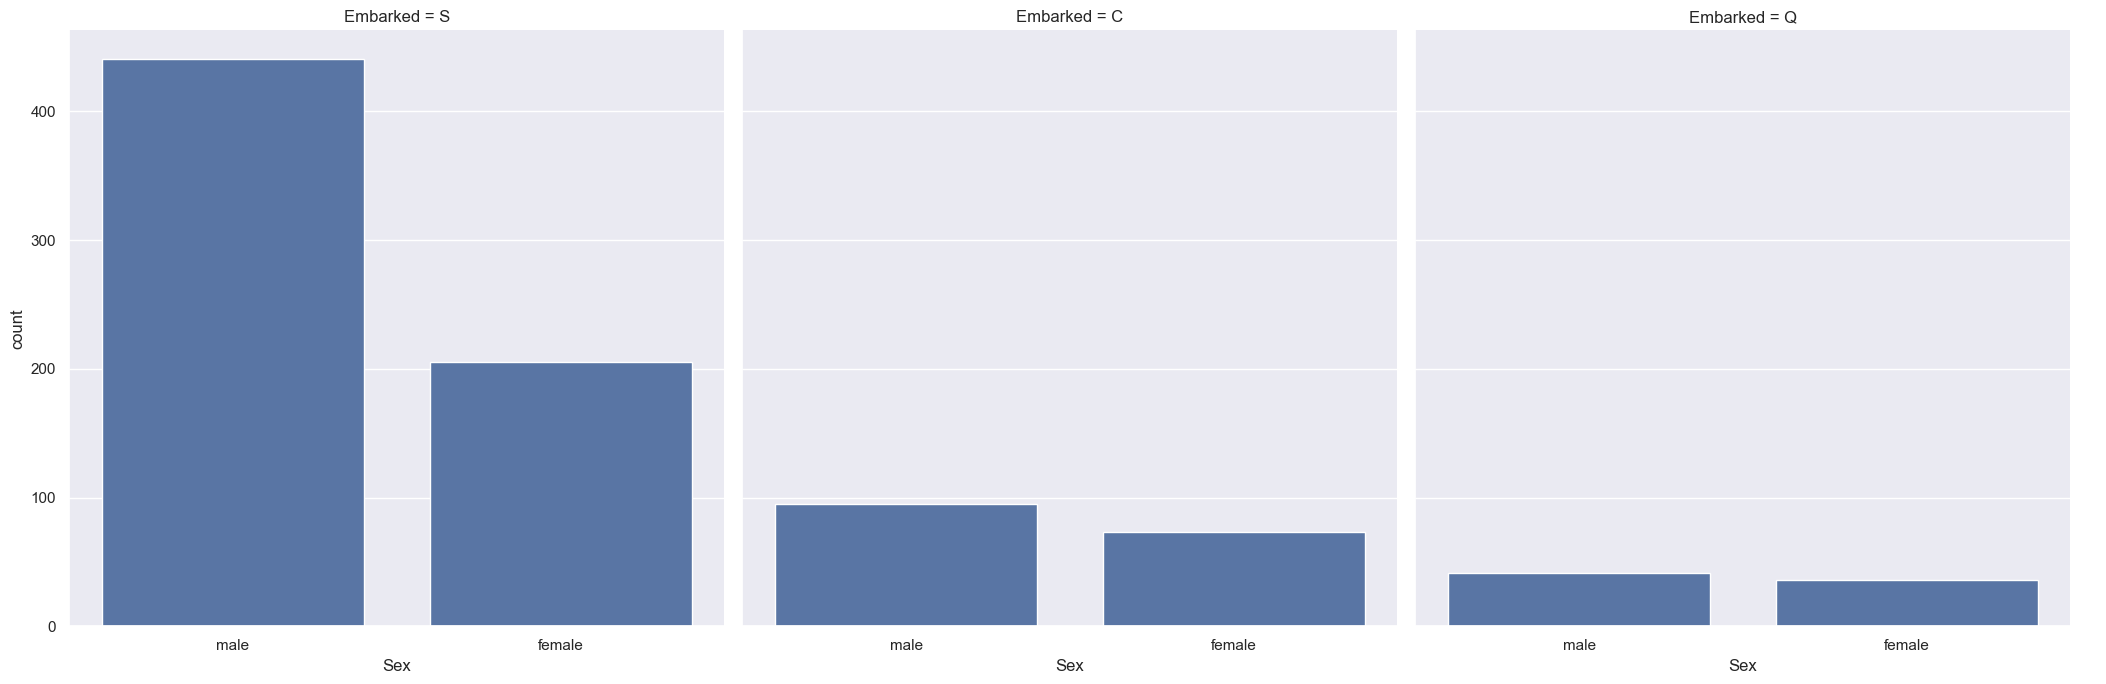

In [61]:
g = sns.catplot(x="Sex", col="Embarked", data=df, height=7, kind="count")

In [62]:
#Cherbourg passengers are mostly in first class which have the highest survival rate.
#Southampton (S) and Queenstown (Q) passangers are mostly in third class.

In [179]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,NaN
1,1,1,1,38.0,1,0,71.2833,NaN
2,1,3,1,26.0,0,0,7.9250,NaN
3,1,1,1,35.0,1,0,53.1000,NaN
4,0,3,0,35.0,0,0,8.0500,NaN


In [105]:
df3= df2.drop('Sex', axis='columns')
df3.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,0,1
0,0,3,22.0,1,0,7.2500,NaN,True,False
1,1,1,38.0,1,0,71.2833,NaN,False,True
2,1,3,26.0,0,0,7.9250,NaN,False,True
3,1,1,35.0,1,0,53.1000,NaN,False,True
4,0,3,35.0,0,0,8.0500,NaN,True,False


In [146]:
df4=df3.drop('Embarked',axis='columns')
df4.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,0,1
0,0,3,22.0,1,0,7.2500,True,False
1,1,1,38.0,1,0,71.2833,False,True
2,1,3,26.0,0,0,7.9250,False,True
3,1,1,35.0,1,0,53.1000,False,True
4,0,3,35.0,0,0,8.0500,True,False


In [147]:
df5=df4.drop('Parch',axis='columns')
df5.head()

,Survived,Pclass,Age,SibSp,Fare,0,1
0,0,3,22.0,1,7.2500,True,False
1,1,1,38.0,1,71.2833,False,True
2,1,3,26.0,0,7.9250,False,True
3,1,1,35.0,1,53.1000,False,True
4,0,3,35.0,0,8.0500,True,False


In [148]:
df6=df5.drop('SibSp',axis='columns')
df6.head()

,Survived,Pclass,Age,Fare,0,1
0,0,3,22.0,7.2500,True,False
1,1,1,38.0,71.2833,False,True
2,1,3,26.0,7.9250,False,True
3,1,1,35.0,53.1000,False,True
4,0,3,35.0,8.0500,True,False


In [150]:
df6.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
0           0
1           0
dtype: int64

In [151]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   Fare      891 non-null    float64
 4   0         891 non-null    bool   
 5   1         891 non-null    bool   
dtypes: bool(2), float64(2), int64(2)
memory usage: 29.7 KB


In [152]:
# Spliting data
X = df6.drop(df.columns[[0]], axis = 1)
y = df6['Survived']

In [153]:
X.head()

,Pclass,Age,Fare,0,1
0,3,22.0,7.2500,True,False
1,1,38.0,71.2833,False,True
2,3,26.0,7.9250,False,True
3,1,35.0,53.1000,False,True
4,3,35.0,8.0500,True,False


In [154]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [155]:
Xtrain.dtypes


Pclass      int64
Age       float64
SibSp       int64
Fare      float64
0            bool
1            bool
dtype: object

In [156]:
Xtrain.columns = Xtrain.columns.astype(str)
Xtrain.info()



<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 857 to 684
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  623 non-null    int64  
 1   Age     623 non-null    float64
 2   SibSp   623 non-null    int64  
 3   Fare    623 non-null    float64
 4   0       623 non-null    bool   
 5   1       623 non-null    bool   
dtypes: bool(2), float64(2), int64(2)
memory usage: 25.6 KB


In [157]:
# splitting into training and testing data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.30, random_state =0)

In [158]:
# Ensure feature names are strings
Xtrain.columns = Xtrain.columns.astype(str)
Xtest.columns = Xtest.columns.astype(str)

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
model = LogisticRegression()
model.fit(Xtrain, ytrain)

LogisticRegression()

In [160]:
predictions = model.predict(Xtest)

In [161]:
accuracy = accuracy_score(ytest, predictions)
report = classification_report(ytest, predictions)

print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.8134328358208955
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       168
           1       0.74      0.77      0.75       100

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.82      0.81      0.81       268



In [177]:
def predict_survival(age, sex, pclass, fare, model):
    # Create a DataFrame with the input data
    input_data = pd.DataFrame({
        'Age': [age],
        'Pclass': [pclass],
        'Fare': [fare],
        'Sex_female': [1 if sex == 'female' else 0],
        'Sex_male': [1 if sex == 'male' else 0]
    })
    
  
    # Make prediction
    prediction = model.predict(input_data)
    
    # Return survival prediction (1 for survived, 0 for not survived)
    return int(prediction[0])

In [178]:
result = predict_survival(age=22, sex='female', pclass=1, fare=50, model=model)
print("Survived" if result == 1 else "Not Survived")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Sex_female
- Sex_male
Feature names seen at fit time, yet now missing:
- 0
- 1
